In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("bhp.csv")
df.head()
df.shape

(13200, 7)

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## 1st Task: to remove the outliers using Percentile Method
### Lets take .999 as upper Threshold and 0.001 as Lower Threshold

In [4]:
df.price_per_sqft.quantile(.95)

np.float64(15312.099999999984)

In [18]:
max_threshold, min_threshold = df.price_per_sqft.quantile([0.999,.001])
max_threshold, min_threshold

(50959.36200000098, 1366.184)

In [19]:
df[(df.price_per_sqft < min_threshold) | (df.price_per_sqft > max_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [26]:
df1 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
df1.shape

(13172, 7)

### df1 is the Datarame after removing the Outlier through percentile method
### now let's proceed with Standard Deviation and Zero Score

In [28]:
min_threshold_sd = df1.price_per_sqft.mean() - 3*df1.price_per_sqft.std()
max_threshold_sd = df1.price_per_sqft.mean() + 3*df1.price_per_sqft.std()

min_threshold_sd, max_threshold_sd

(np.float64(-5759.408365327943), np.float64(19086.715835719682))

In [29]:
df2 = df1[(df1.price_per_sqft > min_threshold_sd) & (df1.price_per_sqft < max_threshold_sd)]
df2.shape

(12874, 7)

## Plotting Histogram and bell Curve

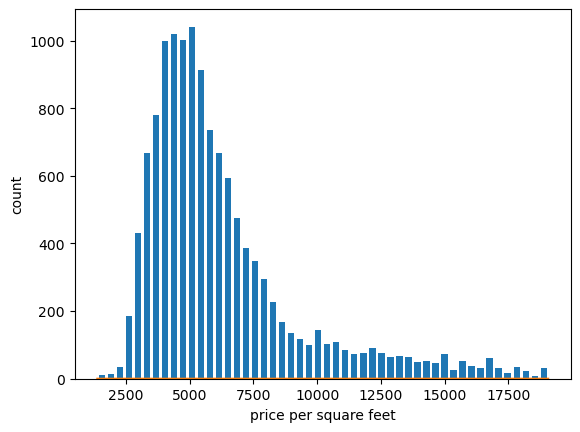

In [36]:
import numpy as np
from scipy.stats import norm
plt.hist(df2.price_per_sqft, bins=50, rwidth=0.7)
plt.xlabel('price per square feet')
plt.ylabel('count')
rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng, df2.price_per_sqft.mean(), df2.price_per_sqft.std()))
plt.show()

## Implementing Z Score

In [ ]:
df1['ZScore'] = (df1.price_per_sqft - df1.price_per_sqft.mean())/ df1.price_per_sqft.std()
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [44]:
df_outlier_removed_via_zScore = df1[(df1.ZScore > -3) & (df1.ZScore < 3)]
df_outlier_removed_via_zScore.shape


(12874, 8)

In [45]:
df_outlier_removed_via_zScore.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [46]:
df2.shape

(12874, 7)

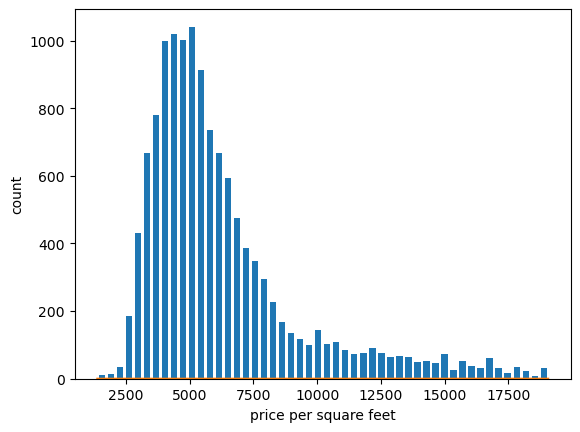

In [47]:
import numpy as np
from scipy.stats import norm
plt.hist(df_outlier_removed_via_zScore.price_per_sqft, bins=50, rwidth=0.7)
plt.xlabel('price per square feet')
plt.ylabel('count')
rng = np.arange(df_outlier_removed_via_zScore.price_per_sqft.min(), df_outlier_removed_via_zScore.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng, df_outlier_removed_via_zScore.price_per_sqft.mean(), df_outlier_removed_via_zScore.price_per_sqft.std()))
plt.show()